In [1]:
import ambulance_game as abg
import numpy as np
import nashpy as nash
import matplotlib.pyplot as plt
import scipy.optimize

In [2]:
from game_theoretic_model import (
    get_accepting_proportion_of_class_2_individuals,
    make_plot_of_distribution_among_two_systems,
    get_mean_blocking_difference_between_two_markov_systems,    
    get_weighted_mean_blocking_difference_between_two_markov_systems,
    calculate_class_2_individuals_best_response_markov,
    get_optimal_distribution_matrix,
    get_payoff_matrices,
    build_game_using_payoff_matrices
)

# Peformance Measures

In [3]:
lambda_1 = 3
lambda_2 = 2
mu = 2
num_of_servers = 2
threshold = 8
system_capacity = 20
buffer_capacity = 10
class_type = None
target = 4

### Blocking Time

In [4]:
abg.markov.get_mean_blocking_time_using_markov_state_probabilities(
    lambda_2=lambda_2, 
    lambda_1=lambda_1, 
    mu=mu, 
    num_of_servers=num_of_servers, 
    threshold=threshold, 
    system_capacity=system_capacity, 
    buffer_capacity=buffer_capacity, 
)

7.692521984343549

### Proportion within target

In [5]:
abg.markov.proportion_within_target_using_markov_state_probabilities(
    lambda_2=lambda_2, 
    lambda_1=lambda_1,
    mu=mu,
    num_of_servers=num_of_servers,
    threshold=threshold,
    system_capacity=system_capacity,
    buffer_capacity=buffer_capacity,
    class_type=class_type,
    target=4,
)

0.8791023960185885

### Proportion lost to the system

In [6]:
get_accepting_proportion_of_class_2_individuals(
    lambda_1=lambda_1,
    lambda_2=lambda_2, 
    mu=mu,
    num_of_servers=num_of_servers,
    threshold=threshold,
    system_capacity=system_capacity,
    buffer_capacity=buffer_capacity,
)

0.5077100091746612

# Distribution of class 2 individuals
There are two deciding factors that should determine the proportion of individuals to be sent to each system. These factors are:
- Blocking time
- Acceptance proportion

Investigated 7 methods to decide how to distribute patients:
- Blocking times
- Accepting props
- Lost proportions
- Blocking * Accepting
- Blocking * Lost
- Blocking * (1 + Accepting)
- Blocking * (1 + Lost)

In [21]:
lambda_2 = 4

lambda_1_1 = 1
mu_1 = 4
num_of_servers_1 = 2
system_capacity_1 = 8
buffer_capacity_1 = 8

lambda_1_2 = 1
mu_2 = 3
num_of_servers_2 = 3
system_capacity_2 = 8
buffer_capacity_2 = 8

class_type = None
target = 4

### Blocking times: $B_1$ and $B_2$
- Cannot be used as it does not consider lost individuals

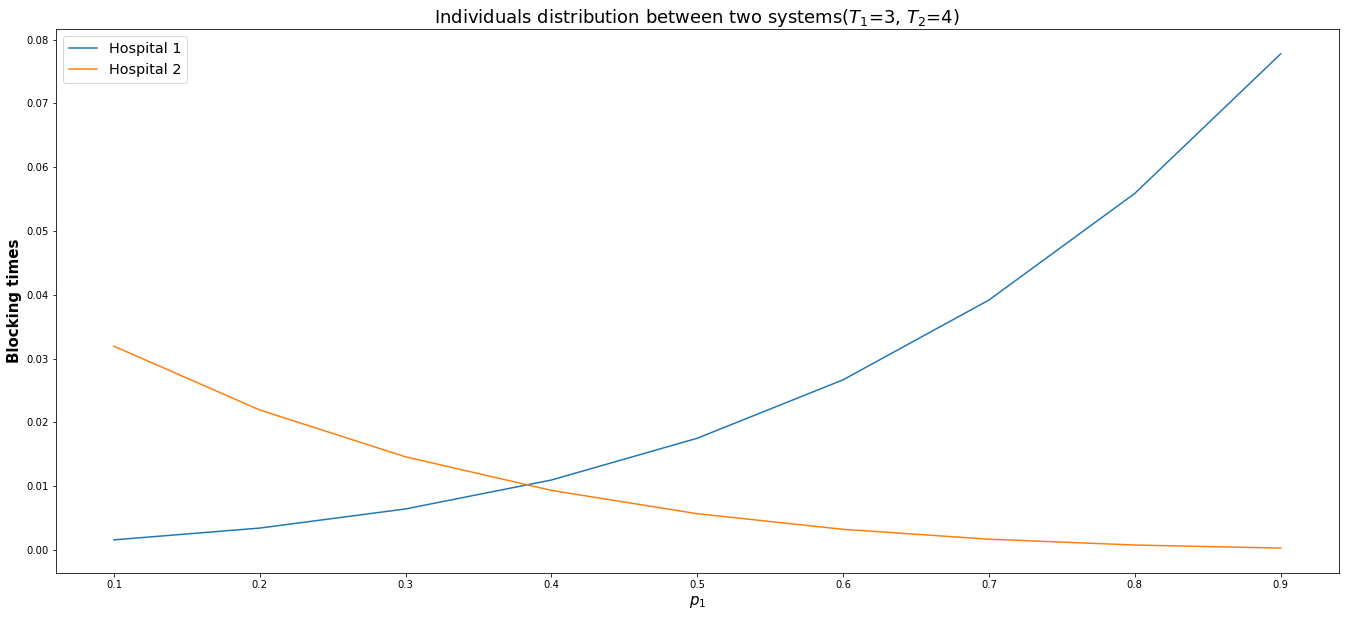

In [8]:
make_plot_of_distribution_among_two_systems(
    lambda_2=lambda_2, 
    lambda_1_1=lambda_1_1, 
    lambda_1_2=lambda_1_2, 
    mu_1=mu_1, 
    mu_2=mu_2, 
    num_of_servers_1=num_of_servers_1, 
    num_of_servers_2=num_of_servers_2, 
    threshold_1=3, 
    threshold_2=4, 
    system_capacity_1=system_capacity_1, 
    system_capacity_2=system_capacity_2, 
    buffer_capacity_1=buffer_capacity_1, 
    buffer_capacity_2=buffer_capacity_2,
    plot_variable=0,
)

### Acceptance proportion: $P(A_1)$ and $P(A_2)$
- Cannot be used as it does not consider the blocking time

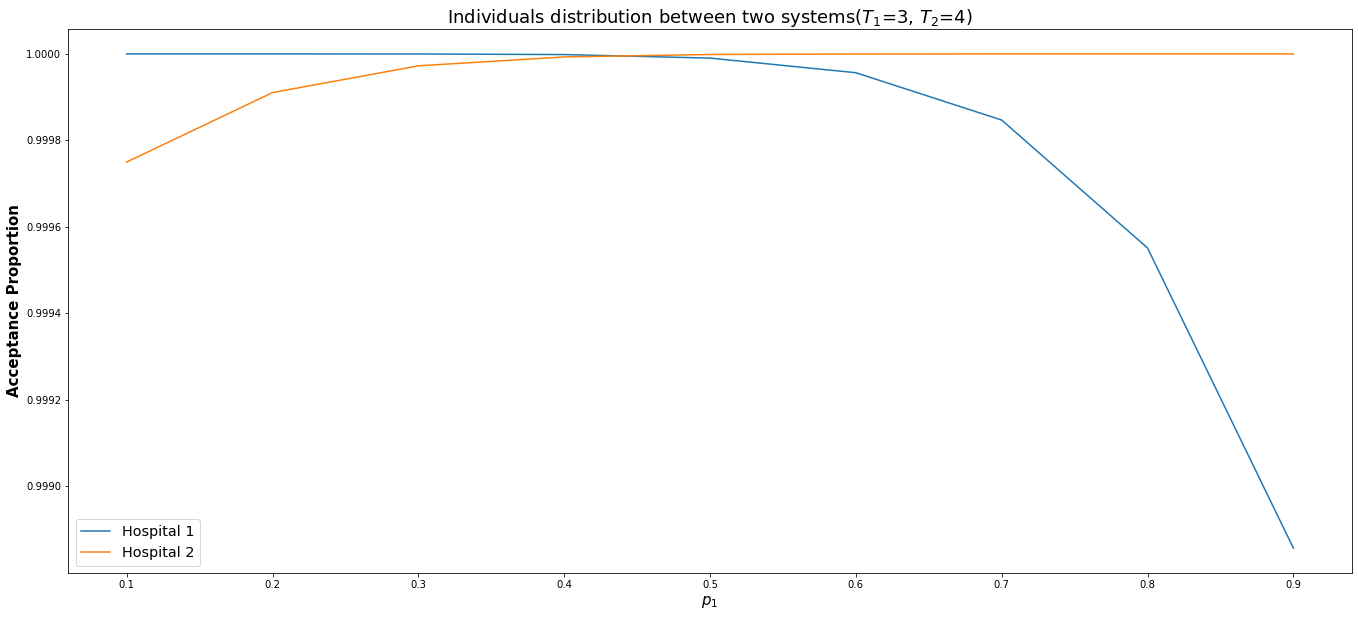

In [44]:
make_plot_of_distribution_among_two_systems(
    lambda_2=lambda_2, 
    lambda_1_1=lambda_1_1, 
    lambda_1_2=lambda_1_2, 
    mu_1=mu_1, 
    mu_2=mu_2, 
    num_of_servers_1=num_of_servers_1, 
    num_of_servers_2=num_of_servers_2, 
    threshold_1=3,
    threshold_2=4, 
    system_capacity_1=system_capacity_1, 
    system_capacity_2=system_capacity_2, 
    buffer_capacity_1=buffer_capacity_1, 
    buffer_capacity_2=buffer_capacity_2,
    plot_variable=1,
)

### Lost proportion: $P(L_1)$ and $P(L_2)$ 
- cannot be used as it does not consider blocking time

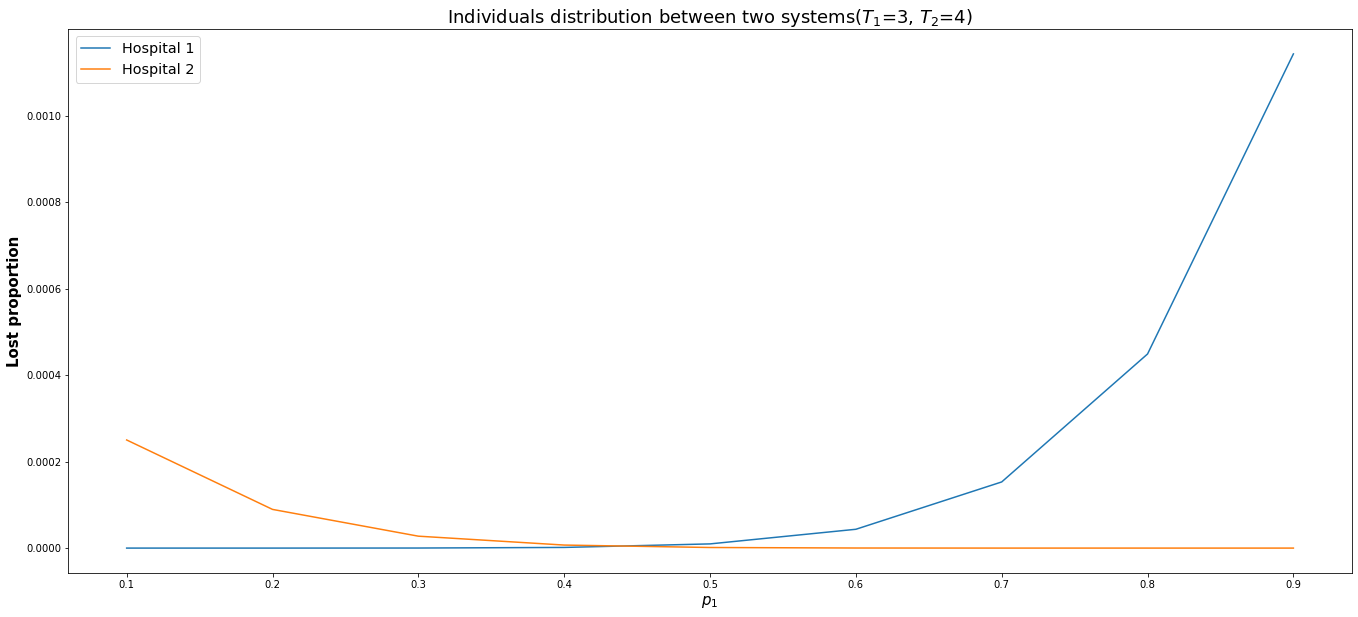

In [45]:
make_plot_of_distribution_among_two_systems(
    lambda_2=lambda_2, 
    lambda_1_1=lambda_1_1, 
    lambda_1_2=lambda_1_2, 
    mu_1=mu_1, 
    mu_2=mu_2, 
    num_of_servers_1=num_of_servers_1, 
    num_of_servers_2=num_of_servers_2, 
    threshold_1=3,
    threshold_2=4, 
    system_capacity_1=system_capacity_1, 
    system_capacity_2=system_capacity_2, 
    buffer_capacity_1=buffer_capacity_1, 
    buffer_capacity_2=buffer_capacity_2,
    plot_variable=2,
)

### Combination of blocking times and acceptance proportion: $P(A_1)B_1$ and $P(A_2)B_2$
- Cannot be used because when $P(A_i) = 0 \qquad \Rightarrow \qquad P(A_i)B_i = 0$

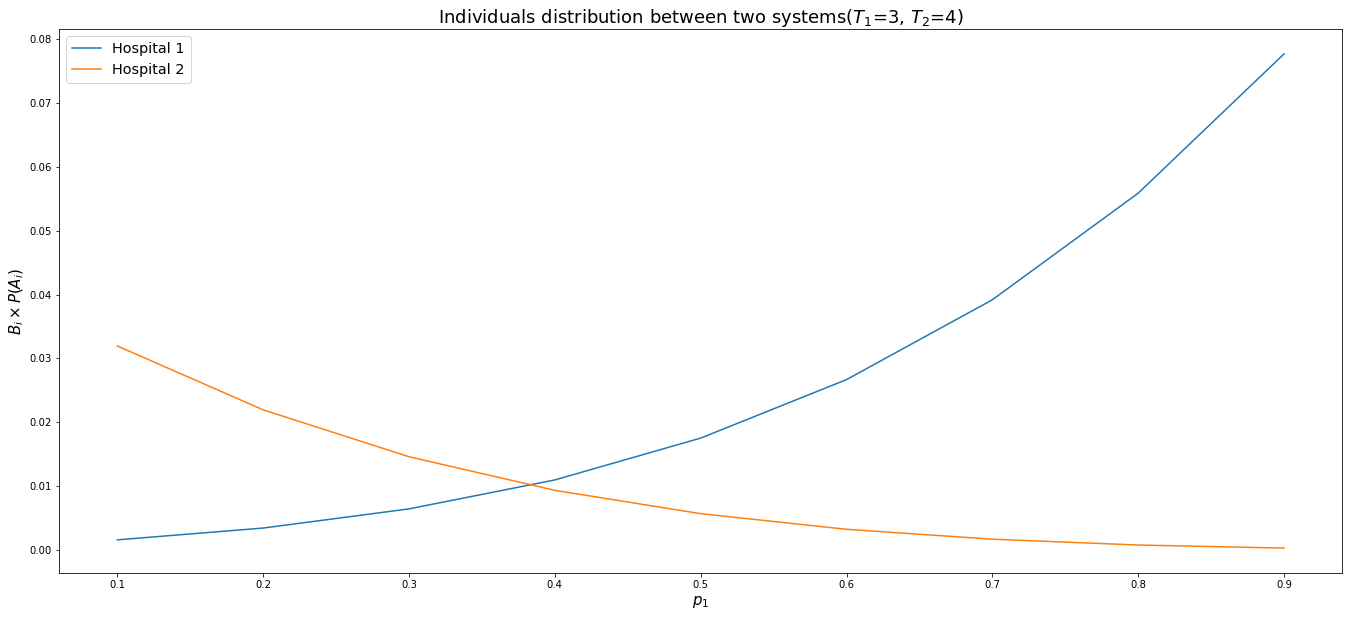

In [46]:
make_plot_of_distribution_among_two_systems(
    lambda_2=lambda_2, 
    lambda_1_1=lambda_1_1, 
    lambda_1_2=lambda_1_2, 
    mu_1=mu_1, 
    mu_2=mu_2, 
    num_of_servers_1=num_of_servers_1, 
    num_of_servers_2=num_of_servers_2, 
    threshold_1=3,
    threshold_2=4, 
    system_capacity_1=system_capacity_1, 
    system_capacity_2=system_capacity_2, 
    buffer_capacity_1=buffer_capacity_1, 
    buffer_capacity_2=buffer_capacity_2,
    plot_variable=3,
)

- Also as $B_i$ decreasing $P(A_i)$ may be increasing as $p_i$ changes

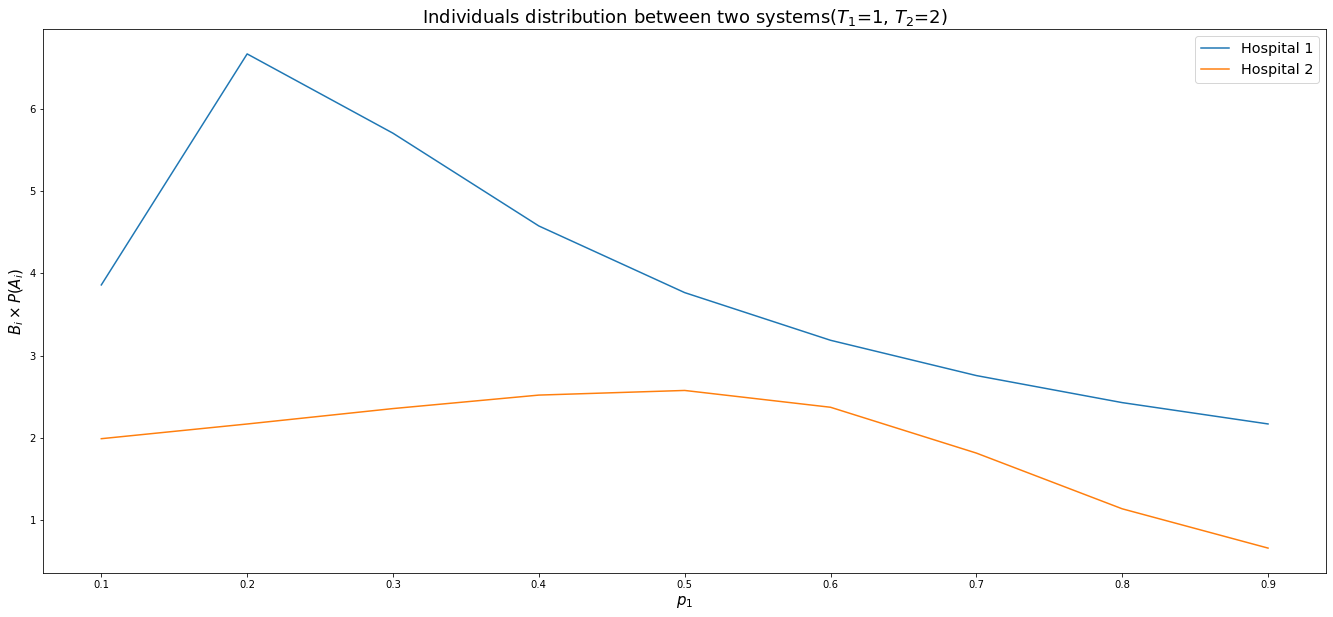

In [47]:
make_plot_of_distribution_among_two_systems(
    lambda_2=5, 
    lambda_1_1=3, 
    lambda_1_2=3, 
    mu_1=2, 
    mu_2=2, 
    num_of_servers_1=3, 
    num_of_servers_2=3, 
    threshold_1=1,
    threshold_2=2, 
    system_capacity_1=10, 
    system_capacity_2=10, 
    buffer_capacity_1=10, 
    buffer_capacity_2=10,
    plot_variable=3,
)

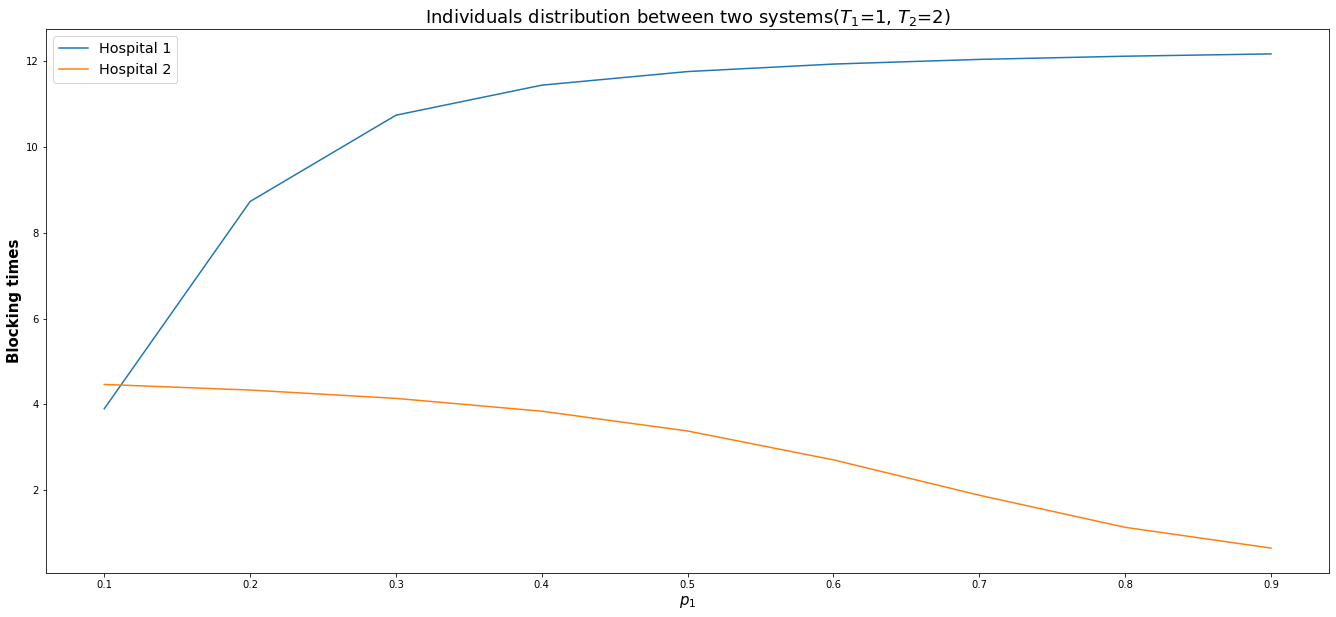

In [25]:
make_plot_of_distribution_among_two_systems(
    lambda_2=5, 
    lambda_1_1=3, 
    lambda_1_2=3, 
    mu_1=2, 
    mu_2=2, 
    num_of_servers_1=3, 
    num_of_servers_2=3, 
    threshold_1=1,
    threshold_2=2, 
    system_capacity_1=10, 
    system_capacity_2=10, 
    buffer_capacity_1=10, 
    buffer_capacity_2=10,
    plot_variable=0,
)

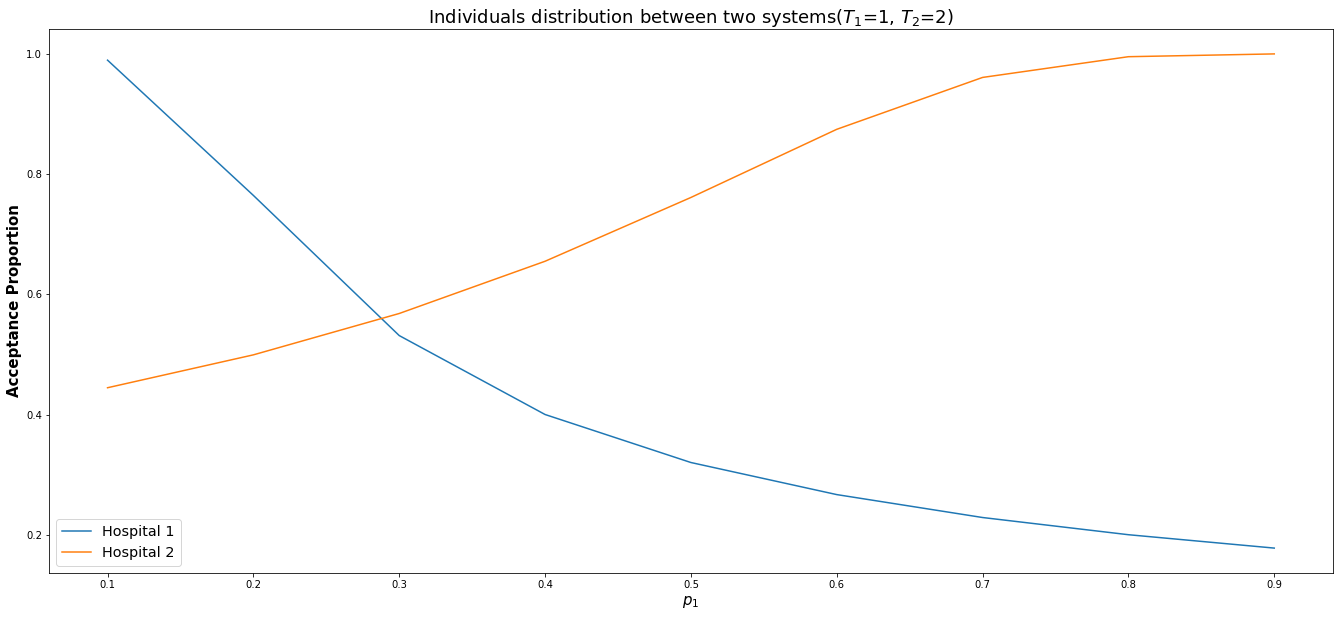

In [27]:
make_plot_of_distribution_among_two_systems(
    lambda_2=5, 
    lambda_1_1=3, 
    lambda_1_2=3, 
    mu_1=2, 
    mu_2=2, 
    num_of_servers_1=3, 
    num_of_servers_2=3, 
    threshold_1=1,
    threshold_2=2, 
    system_capacity_1=10, 
    system_capacity_2=10, 
    buffer_capacity_1=10, 
    buffer_capacity_2=10,
    plot_variable=1,
)

### Combination of blocking times and acceptance proportion: $P(L_1)B_1$ and $P(L_2)B_2$
- Cannot be used because when both $P(L_1) = P(L_2) = 0 \qquad \Rightarrow \qquad P(L_1)B_1 = P(L_2)B_2 = 0$

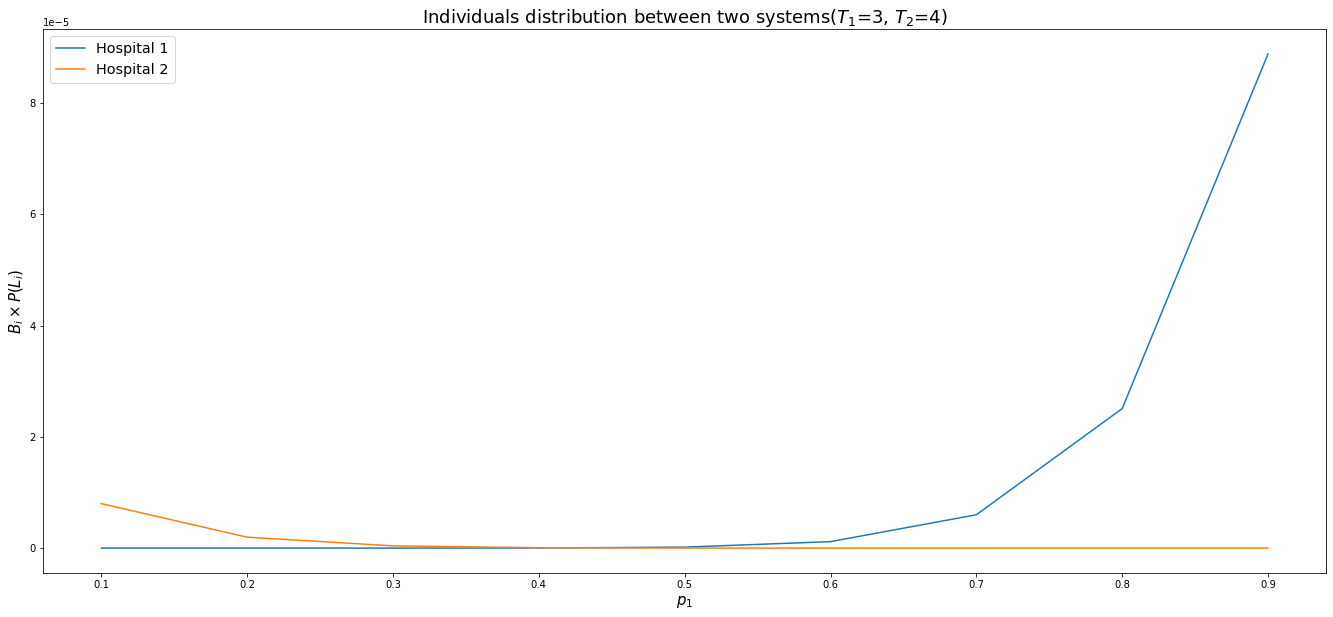

In [48]:
make_plot_of_distribution_among_two_systems(
    lambda_2=lambda_2, 
    lambda_1_1=lambda_1_1, 
    lambda_1_2=lambda_1_2, 
    mu_1=mu_1, 
    mu_2=mu_2, 
    num_of_servers_1=num_of_servers_1, 
    num_of_servers_2=num_of_servers_2, 
    threshold_1=3,
    threshold_2=4, 
    system_capacity_1=system_capacity_1, 
    system_capacity_2=system_capacity_2, 
    buffer_capacity_1=buffer_capacity_1, 
    buffer_capacity_2=buffer_capacity_2,
    plot_variable=4,
)

### Combination of blocking times and acceptance proportion: $[1 + P(A_1)]B_1$ and $[1 + P(A_2)]B_2$
- Cannot be used because, as $B_i$ decreases $P(A_i)$ increases

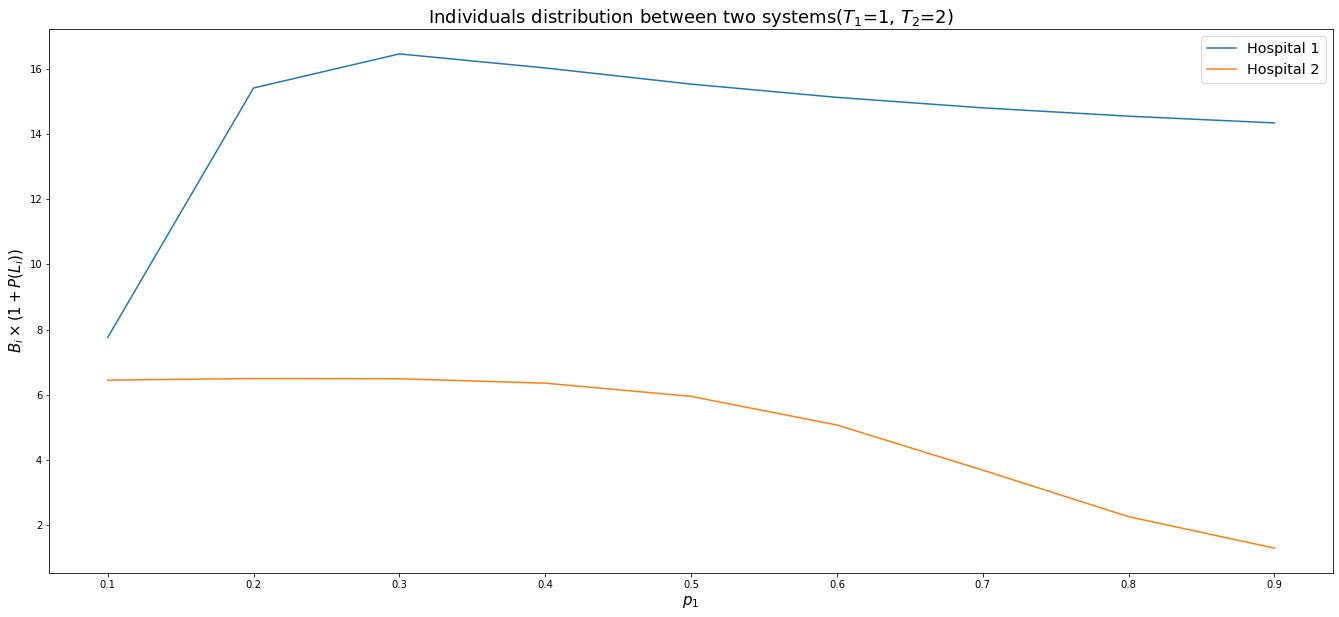

In [49]:
make_plot_of_distribution_among_two_systems(
    lambda_2=5, 
    lambda_1_1=3, 
    lambda_1_2=3, 
    mu_1=2, 
    mu_2=2, 
    num_of_servers_1=3, 
    num_of_servers_2=3, 
    threshold_1=1,
    threshold_2=2, 
    system_capacity_1=10, 
    system_capacity_2=10, 
    buffer_capacity_1=10, 
    buffer_capacity_2=10,
    plot_variable=5,
)

### Combination of blocking times and acceptance proportion: $[1 + P(L_1)]B_1$ and $[1 + P(L_2)]B_2$

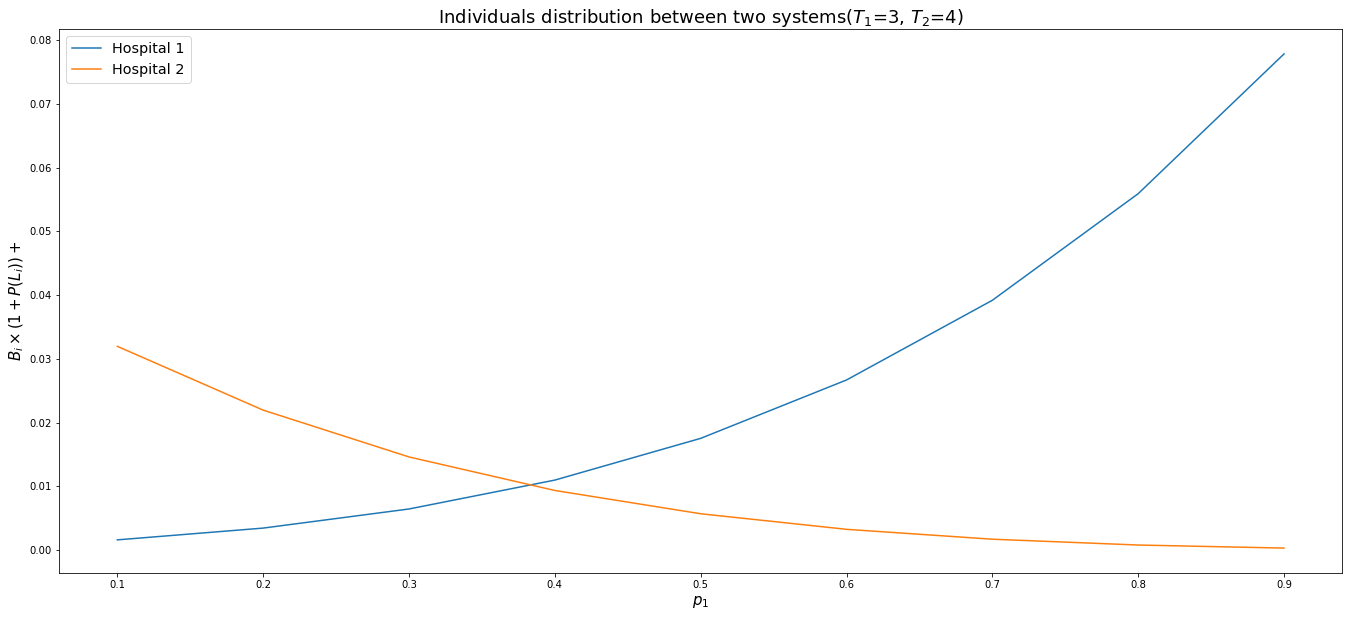

In [50]:
make_plot_of_distribution_among_two_systems(
    lambda_2=lambda_2, 
    lambda_1_1=lambda_1_1, 
    lambda_1_2=lambda_1_2, 
    mu_1=mu_1, 
    mu_2=mu_2, 
    num_of_servers_1=num_of_servers_1, 
    num_of_servers_2=num_of_servers_2, 
    threshold_1=3,
    threshold_2=4, 
    system_capacity_1=system_capacity_1, 
    system_capacity_2=system_capacity_2, 
    buffer_capacity_1=buffer_capacity_1, 
    buffer_capacity_2=buffer_capacity_2,
    plot_variable=6,
)

# The whole problem

$$
    p_{i,j} = \{ \quad p \quad | \quad B_1(1 + P(L_1)) \, = \, B_2(1 + P(L_2)) \}
$$

$$
D = 
\begin{bmatrix}
    p_{1,1} & p_{1,2} & p_{1,3} & p_{1,4} \\
    p_{2,1} & p_{2,2} & p_{2,3} & p_{2,4} \\
    p_{3,1} & p_{3,2} & p_{3,3} & p_{3,4} \\
    p_{4,1} & p_{4,2} & p_{4,3} & p_{4,4} 
\end{bmatrix}
$$


$$
A = 
\begin{bmatrix}
    P(W_1(p_{1,1}) < t) & P(W_1(p_{1,2}) < t) & P(W_1(p_{1,3}) < t) & P(W_1(p_{1,4}) < t) \\
    P(W_1(p_{2,1}) < t) & P(W_1(p_{2,2}) < t) & P(W_1(p_{2,3}) < t) & P(W_1(p_{2,4}) < t) \\
    P(W_1(p_{3,1}) < t) & P(W_1(p_{3,2}) < t) & P(W_1(p_{3,3}) < t) & P(W_1(p_{3,4}) < t) \\
    P(W_1(p_{4,1}) < t) & P(W_1(p_{4,2}) < t) & P(W_1(p_{4,3}) < t) & P(W_1(p_{4,4}) < t) 
\end{bmatrix} \\
$$

$$
B = 
\begin{bmatrix}
    P(W_2(1 - p_{1,1}) < t) & P(W_2(1 - p_{1,2}) < t) & P(W_2(1 - p_{1,3}) < t) & P(W_2(1 - p_{1,4}) < t) \\
    P(W_2(1 - p_{2,1}) < t) & P(W_2(1 - p_{2,2}) < t) & P(W_2(1 - p_{2,3}) < t) & P(W_2(1 - p_{2,4}) < t) \\
    P(W_2(1 - p_{3,1}) < t) & P(W_2(1 - p_{3,2}) < t) & P(W_2(1 - p_{3,3}) < t) & P(W_2(1 - p_{3,4}) < t) \\
    P(W_2(1 - p_{4,1}) < t) & P(W_2(1 - p_{4,2}) < t) & P(W_2(1 - p_{4,3}) < t) & P(W_2(1 - p_{4,4}) < t) 
\end{bmatrix}
$$


# Ambulance distribution matrix

The ambulance distribution matrix consists of the proportion of patients to dstribute to the first hospital for all possible combinations of thresholds of the two hospitals. For every set of thresholds $(T_1, T_2)$ Brent's method is used to find the value for which a defined **optimsiation function** is $0$.

The **optimsiation function** here is simply the difference between the two blocking times: $B_1 - B_2 = 0$. For every set of $(T_1, T_2)$ scipy's brentq() function is used to find the value of $p_1, p_2$ for which $B_1=B_2$. 

In [51]:
distribution_array_1 = get_optimal_distribution_matrix(
    lambda_2=lambda_2,
    lambda_1_1=lambda_1_1,
    lambda_1_2=lambda_1_2,
    mu_1=mu_1,
    mu_2=mu_2,
    num_of_servers_1=num_of_servers_1,
    num_of_servers_2=num_of_servers_2,
    system_capacity_1=system_capacity_1,
    system_capacity_2=system_capacity_2,
    buffer_capacity_1=buffer_capacity_1,
    buffer_capacity_2=buffer_capacity_2,
    optimisation_function=get_mean_blocking_difference_between_two_markov_systems,
)
distribution_array_1

array([[0.63124947, 0.27072338, 0.02399496, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.95545259, 0.61861689, 0.35540886, 0.2430649 , 0.15876321,
        0.09220333, 0.03453974, 0.        ],
       [1.        , 0.72640481, 0.496715  , 0.3833988 , 0.29609441,
        0.22559781, 0.16383588, 0.08795673],
       [1.        , 0.80594347, 0.59875928, 0.48683587, 0.39909454,
        0.32724656, 0.26396047, 0.18869792],
       [1.        , 0.86796579, 0.67757039, 0.56792564, 0.48084477,
        0.40879874, 0.34509581, 0.27123166],
       [1.        , 0.91873242, 0.74171041, 0.63462003, 0.54866418,
        0.47696146, 0.41336447, 0.34107192],
       [1.        , 0.96555818, 0.79949755, 0.69456228, 0.60955938,
        0.53816856, 0.47469545, 0.40374812],
       [1.        , 1.        , 0.87692988, 0.77065406, 0.68385758,
        0.61065133, 0.54559928, 0.47436634]])

We can adjust the **optimisation function** to consider for lost individuals. One approach is to use a combination of the blocking time and the lost individuals to the system:

$$
    (1 + P(L_1))B_1 = (1 + P(L_2))B_2
$$

In [52]:
distribution_array_2 = get_optimal_distribution_matrix(
    lambda_2=lambda_2,
    lambda_1_1=lambda_1_1,
    lambda_1_2=lambda_1_2,
    mu_1=mu_1,
    mu_2=mu_2,
    num_of_servers_1=num_of_servers_1,
    num_of_servers_2=num_of_servers_2,
    system_capacity_1=system_capacity_1,
    system_capacity_2=system_capacity_2,
    buffer_capacity_1=buffer_capacity_1,
    buffer_capacity_2=buffer_capacity_2,
    optimisation_function=get_weighted_mean_blocking_difference_between_two_markov_systems,
)
distribution_array_2

array([[0.62933255, 0.27109946, 0.02411915, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.95504218, 0.61859947, 0.35541336, 0.24307145, 0.15876999,
        0.09220921, 0.03454375, 0.        ],
       [1.        , 0.72637869, 0.49671442, 0.38339961, 0.29609548,
        0.22559883, 0.1638366 , 0.08795693],
       [1.        , 0.80591624, 0.59875748, 0.48683577, 0.39909472,
        0.32724677, 0.26396062, 0.18869797],
       [1.        , 0.86794077, 0.67756816, 0.5679253 , 0.48084475,
        0.40879877, 0.34509584, 0.27123167],
       [1.        , 0.91871155, 0.74170823, 0.63461966, 0.54866412,
        0.47696146, 0.41336448, 0.34107192],
       [1.        , 0.96554385, 0.79949593, 0.69456199, 0.60955933,
        0.53816855, 0.47469545, 0.40374812],
       [1.        , 1.        , 0.87692936, 0.77065397, 0.68385756,
        0.61065133, 0.54559928, 0.47436634]])

# Payoff matrices

In [53]:
payoff_matrices_1 = get_payoff_matrices(
    lambda_2=lambda_2,
    lambda_1_1=lambda_1_1,
    lambda_1_2=lambda_1_2,
    mu_1=mu_1,
    mu_2=mu_2,
    num_of_servers_1=num_of_servers_1,
    num_of_servers_2=num_of_servers_2,
    system_capacity_1=system_capacity_1,
    system_capacity_2=system_capacity_2,
    buffer_capacity_1=buffer_capacity_1,
    buffer_capacity_2=buffer_capacity_2,
    target=0.5,
    distribution_array=distribution_array_1,
)
payoff_matrices_1

(array([[0.86077081, 0.86077081, 0.86077081, 0.86077081, 0.86077081,
         0.86077081, 0.86077081, 0.86077081],
        [0.85151182, 0.85405416, 0.85652142, 0.85773367, 0.85871761,
         0.85954451, 0.86029984, 0.86077081],
        [0.79767311, 0.81979234, 0.83620913, 0.84330854, 0.84824564,
         0.85185653, 0.85471899, 0.85781656],
        [0.75338729, 0.78636544, 0.81519417, 0.82790961, 0.83648949,
         0.84262098, 0.84736565, 0.85222241],
        [0.72399171, 0.75734899, 0.79597992, 0.81349053, 0.82516474,
         0.83344505, 0.83979846, 0.8461047 ],
        [0.70813921, 0.73376153, 0.77913272, 0.80039729, 0.81456036,
         0.82461526, 0.83232373, 0.83983279],
        [0.70193931, 0.71413518, 0.76361445, 0.78785151, 0.80411579,
         0.81573684, 0.8246758 , 0.83327465],
        [0.70471675, 0.70471675, 0.74367374, 0.77137857, 0.79035859,
         0.80408258, 0.81469204, 0.82475872]]),
 array([[0.77625851, 0.77520392, 0.76968485, 0.74013236, 0.71993966,
         

In [54]:
payoff_matrices_2 = get_payoff_matrices(
    lambda_2=lambda_2,
    lambda_1_1=lambda_1_1,
    lambda_1_2=lambda_1_2,
    mu_1=mu_1,
    mu_2=mu_2,
    num_of_servers_1=num_of_servers_1,
    num_of_servers_2=num_of_servers_2,
    system_capacity_1=system_capacity_1,
    system_capacity_2=system_capacity_2,
    buffer_capacity_1=buffer_capacity_1,
    buffer_capacity_2=buffer_capacity_2,
    target=0.5,
    distribution_array=distribution_array_2,
)
payoff_matrices_2

(array([[0.86077081, 0.86077081, 0.86077081, 0.86077081, 0.86077081,
         0.86077081, 0.86077081, 0.86077081],
        [0.85151455, 0.85405431, 0.85652137, 0.8577336 , 0.85871753,
         0.85954443, 0.86029978, 0.86077081],
        [0.79767311, 0.81979434, 0.83620917, 0.84330849, 0.84824558,
         0.85185648, 0.85471895, 0.85781655],
        [0.75338729, 0.78636968, 0.81519439, 0.82790962, 0.83648948,
         0.84262097, 0.84736564, 0.85222241],
        [0.72399171, 0.7573548 , 0.79598031, 0.81349058, 0.82516475,
         0.83344504, 0.83979846, 0.8461047 ],
        [0.70813921, 0.73376771, 0.7791332 , 0.80039735, 0.81456037,
         0.82461527, 0.83232373, 0.83983279],
        [0.70193931, 0.71414011, 0.76361487, 0.78785157, 0.8041158 ,
         0.81573685, 0.8246758 , 0.83327465],
        [0.70471675, 0.70471675, 0.74367389, 0.77137859, 0.79035859,
         0.80408258, 0.81469204, 0.82475872]]),
 array([[0.77625851, 0.77520429, 0.76968572, 0.74013236, 0.71993966,
         

# The game

In [56]:
hospital_game_1 = nash.Game(payoff_matrices_1[0], payoff_matrices_1[1])
hospital_game_1

Bi matrix game with payoff matrices:

Row player:
[[0.86077081 0.86077081 0.86077081 0.86077081 0.86077081 0.86077081
  0.86077081 0.86077081]
 [0.85151182 0.85405416 0.85652142 0.85773367 0.85871761 0.85954451
  0.86029984 0.86077081]
 [0.79767311 0.81979234 0.83620913 0.84330854 0.84824564 0.85185653
  0.85471899 0.85781656]
 [0.75338729 0.78636544 0.81519417 0.82790961 0.83648949 0.84262098
  0.84736565 0.85222241]
 [0.72399171 0.75734899 0.79597992 0.81349053 0.82516474 0.83344505
  0.83979846 0.8461047 ]
 [0.70813921 0.73376153 0.77913272 0.80039729 0.81456036 0.82461526
  0.83232373 0.83983279]
 [0.70193931 0.71413518 0.76361445 0.78785151 0.80411579 0.81573684
  0.8246758  0.83327465]
 [0.70471675 0.70471675 0.74367374 0.77137857 0.79035859 0.80408258
  0.81469204 0.82475872]]

Column player:
[[0.77625851 0.77520392 0.76968485 0.74013236 0.71993966 0.70811234
  0.7026449  0.70270769]
 [0.77625851 0.77561227 0.77209124 0.75430332 0.73719367 0.72200653
  0.70886679 0.70270769]
 [0

In [57]:
hospital_game_2 = nash.Game(payoff_matrices_2[0], payoff_matrices_2[1])
hospital_game_2

Bi matrix game with payoff matrices:

Row player:
[[0.86077081 0.86077081 0.86077081 0.86077081 0.86077081 0.86077081
  0.86077081 0.86077081]
 [0.85151455 0.85405431 0.85652137 0.8577336  0.85871753 0.85954443
  0.86029978 0.86077081]
 [0.79767311 0.81979434 0.83620917 0.84330849 0.84824558 0.85185648
  0.85471895 0.85781655]
 [0.75338729 0.78636968 0.81519439 0.82790962 0.83648948 0.84262097
  0.84736564 0.85222241]
 [0.72399171 0.7573548  0.79598031 0.81349058 0.82516475 0.83344504
  0.83979846 0.8461047 ]
 [0.70813921 0.73376771 0.7791332  0.80039735 0.81456037 0.82461527
  0.83232373 0.83983279]
 [0.70193931 0.71414011 0.76361487 0.78785157 0.8041158  0.81573685
  0.8246758  0.83327465]
 [0.70471675 0.70471675 0.74367389 0.77137859 0.79035859 0.80408258
  0.81469204 0.82475872]]

Column player:
[[0.77625851 0.77520429 0.76968572 0.74013236 0.71993966 0.70811234
  0.7026449  0.70270769]
 [0.77625851 0.77561224 0.77209127 0.75430366 0.73719434 0.72200736
  0.70886749 0.70270769]
 [0

### Lemke-Howson

In [58]:
hospital_game_1.lemke_howson(initial_dropped_label=0)

(array([1., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0.]))

In [61]:
hospital_game_2.lemke_howson(initial_dropped_label=0)

(array([1., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0.]))

### Support Enumeration

In [59]:
list(hospital_game_1.support_enumeration())

[(array([1., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0.]))]

In [62]:
list(hospital_game_2.support_enumeration())

[(array([1., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0.]))]

### Vertex Enumeration 

In [60]:
list(hospital_game_1.vertex_enumeration())

[(array([ nan,  nan,  nan,  nan,  inf, -inf,  nan,  nan]),
  array([0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. ])),
 (array([ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          2.15455018e-17, -1.07727509e-17,  1.07727509e-17,  0.00000000e+00]),
  array([ 1.00000000e+00,  0.00000000e+00,  2.38911893e-17, -1.19455946e-17,
          0.00000000e+00,  0.00000000e+00, -1.19455946e-17, -1.19455946e-17]))]

In [63]:
list(hospital_game_2.vertex_enumeration())

[(array([-0. , -0.5,  1. , -0. , -0.5,  0.5, -0. ,  0.5]),
  array([ 1.,  0.,  0.,  0.,  0., -1.,  1.,  0.])),
 (array([ 1.00000000e+00,  3.23182527e-17, -1.07727509e-17,  0.00000000e+00,
          2.15455018e-17,  0.00000000e+00,  1.07727509e-17,  0.00000000e+00]),
  array([ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.19455946e-17,
          0.00000000e+00, -1.19455946e-17,  0.00000000e+00,  0.00000000e+00]))]

### Fictitious Play

In [68]:
play_counts_1 = tuple(hospital_game_1.fictitious_play(iterations=10000))
play_counts_1[-1]

[array([9.999e+03, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00]),
 array([9.999e+03, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00])]

In [69]:
play_counts_2 = tuple(hospital_game_2.fictitious_play(iterations=10000))
play_counts_2[-1]

[array([9.999e+03, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00]),
 array([9.999e+03, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00])]

# The whole problem

$$
    p_{i,j} = \{ \quad p \quad | \quad B_1(1 + P(L_1)) \, = \, B_2(1 + P(L_2)) \}
$$

$$
D = 
\begin{bmatrix}
    p_{1,1} & p_{1,2} & p_{1,3} & p_{1,4} \\
    p_{2,1} & p_{2,2} & p_{2,3} & p_{2,4} \\
    p_{3,1} & p_{3,2} & p_{3,3} & p_{3,4} \\
    p_{4,1} & p_{4,2} & p_{4,3} & p_{4,4} 
\end{bmatrix}
$$


$$
A = 
\begin{bmatrix}
    P(W_1(p_{1,1}) < t) & P(W_1(p_{1,2}) < t) & P(W_1(p_{1,3}) < t) & P(W_1(p_{1,4}) < t) \\
    P(W_1(p_{2,1}) < t) & P(W_1(p_{2,2}) < t) & P(W_1(p_{2,3}) < t) & P(W_1(p_{2,4}) < t) \\
    P(W_1(p_{3,1}) < t) & P(W_1(p_{3,2}) < t) & P(W_1(p_{3,3}) < t) & P(W_1(p_{3,4}) < t) \\
    P(W_1(p_{4,1}) < t) & P(W_1(p_{4,2}) < t) & P(W_1(p_{4,3}) < t) & P(W_1(p_{4,4}) < t) 
\end{bmatrix} \\
$$

$$
B = 
\begin{bmatrix}
    P(W_2(1 - p_{1,1}) < t) & P(W_2(1 - p_{1,2}) < t) & P(W_2(1 - p_{1,3}) < t) & P(W_2(1 - p_{1,4}) < t) \\
    P(W_2(1 - p_{2,1}) < t) & P(W_2(1 - p_{2,2}) < t) & P(W_2(1 - p_{2,3}) < t) & P(W_2(1 - p_{2,4}) < t) \\
    P(W_2(1 - p_{3,1}) < t) & P(W_2(1 - p_{3,2}) < t) & P(W_2(1 - p_{3,3}) < t) & P(W_2(1 - p_{3,4}) < t) \\
    P(W_2(1 - p_{4,1}) < t) & P(W_2(1 - p_{4,2}) < t) & P(W_2(1 - p_{4,3}) < t) & P(W_2(1 - p_{4,4}) < t) 
\end{bmatrix}
$$


# Looking into the above problem

In [43]:
A = np.array([
        [0.86077081, 0.86077081, 0.86077081, 0.86077081, 0.86077081, 0.86077081, 0.86077081, 0.86077081], 
        [0.85151455, 0.85405431, 0.85652137, 0.8577336 , 0.85871753, 0.85954443, 0.86029978, 0.86077081],
        [0.79767311, 0.81979434, 0.83620917, 0.84330849, 0.84824558, 0.85185648, 0.85471895, 0.85781655],
        [0.75338729, 0.78636968, 0.81519439, 0.82790962, 0.83648948, 0.84262097, 0.84736564, 0.85222241],
        [0.72399171, 0.7573548 , 0.79598031, 0.81349058, 0.82516475, 0.83344504, 0.83979846, 0.8461047 ],
        [0.70813921, 0.73376771, 0.7791332 , 0.80039735, 0.81456037, 0.82461527, 0.83232373, 0.83983279],
        [0.70193931, 0.71414011, 0.76361487, 0.78785157, 0.8041158 , 0.81573685, 0.8246758 , 0.83327465],
        [0.70471675, 0.70471675, 0.74367389, 0.77137859, 0.79035859, 0.80408258, 0.81469204, 0.82475872]])
         
B = np.array([
        [0.77625851, 0.77520429, 0.76968572, 0.74013236, 0.71993966, 0.70811234, 0.7026449 , 0.70270769],
        [0.77625851, 0.77561224, 0.77209127, 0.75430366, 0.73719434, 0.72200736, 0.70886749, 0.70270769],
        [0.77625851, 0.77576922, 0.77312261, 0.76101764, 0.74928554, 0.73861529, 0.7288937 , 0.71773848],
        [0.77625851, 0.77589668, 0.77385023, 0.76521279, 0.75669008, 0.7487376 , 0.7412103 , 0.73216012],
        [0.77625851, 0.77600386, 0.77439356, 0.76803806, 0.76160106, 0.75543101, 0.74940475, 0.74197019],
        [0.77625851, 0.77609723, 0.77481833, 0.77005175, 0.76505886, 0.76013698, 0.7551968 , 0.74900261],
        [0.77625851, 0.77618828, 0.77518349, 0.77162207, 0.76771141, 0.76372965, 0.75962511, 0.75441464],
        [0.77625851, 0.77625851, 0.77563948, 0.77329149, 0.77040159, 0.76727488, 0.76391954, 0.75958767]])


In [44]:
my_hospital_game = nash.Game(A, B)
my_hospital_game

Bi matrix game with payoff matrices:

Row player:
[[0.86077081 0.86077081 0.86077081 0.86077081 0.86077081 0.86077081
  0.86077081 0.86077081]
 [0.85151455 0.85405431 0.85652137 0.8577336  0.85871753 0.85954443
  0.86029978 0.86077081]
 [0.79767311 0.81979434 0.83620917 0.84330849 0.84824558 0.85185648
  0.85471895 0.85781655]
 [0.75338729 0.78636968 0.81519439 0.82790962 0.83648948 0.84262097
  0.84736564 0.85222241]
 [0.72399171 0.7573548  0.79598031 0.81349058 0.82516475 0.83344504
  0.83979846 0.8461047 ]
 [0.70813921 0.73376771 0.7791332  0.80039735 0.81456037 0.82461527
  0.83232373 0.83983279]
 [0.70193931 0.71414011 0.76361487 0.78785157 0.8041158  0.81573685
  0.8246758  0.83327465]
 [0.70471675 0.70471675 0.74367389 0.77137859 0.79035859 0.80408258
  0.81469204 0.82475872]]

Column player:
[[0.77625851 0.77520429 0.76968572 0.74013236 0.71993966 0.70811234
  0.7026449  0.70270769]
 [0.77625851 0.77561224 0.77209127 0.75430366 0.73719434 0.72200736
  0.70886749 0.70270769]
 [0

In [45]:
list(my_hospital_game.support_enumeration())

[(array([1., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0.]))]

In [46]:
list(my_hospital_game.vertex_enumeration())

[(array([ 0.25,  0.25,  0.25,  0.25,  0.  ,  0.  , -0.25,  0.25]),
  array([-0.        ,  0.33333333,  0.33333333, -0.33333333,  0.33333333,
          0.33333333, -0.        , -0.        ])),
 (array([ 1.00000000e+00,  1.07727509e-17,  1.07727509e-17,  0.00000000e+00,
         -1.07727509e-17,  0.00000000e+00, -1.07727509e-17,  0.00000000e+00]),
  array([ 1.00000000e+00,  0.00000000e+00, -2.38911893e-17,  1.19455947e-17,
         -1.19455947e-17, -2.38911893e-17,  0.00000000e+00,  0.00000000e+00]))]

In [34]:
ficititious_play_array = tuple(my_hospital_game.fictitious_play(iterations=100))
ficititious_play_array[-1]

[array([100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([99.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])]

### Remove $T=1,2$ strategies

In [47]:
A = np.array([
        [0.82790962, 0.83648948, 0.84262097, 0.84736564, 0.85222241],
        [0.81349058, 0.82516475, 0.83344504, 0.83979846, 0.8461047 ],
        [0.80039735, 0.81456037, 0.82461527, 0.83232373, 0.83983279],
        [0.78785157, 0.8041158 , 0.81573685, 0.8246758 , 0.83327465],
        [0.77137859, 0.79035859, 0.80408258, 0.81469204, 0.82475872]])
         
B = np.array([
        [0.76521279, 0.75669008, 0.7487376 , 0.7412103 , 0.73216012],
        [0.76803806, 0.76160106, 0.75543101, 0.74940475, 0.74197019],
        [0.77005175, 0.76505886, 0.76013698, 0.7551968 , 0.74900261],
        [0.77162207, 0.76771141, 0.76372965, 0.75962511, 0.75441464],
        [0.77329149, 0.77040159, 0.76727488, 0.76391954, 0.75958767]])

In [48]:
my_hospital_game = nash.Game(A, B)
my_hospital_game

Bi matrix game with payoff matrices:

Row player:
[[0.82790962 0.83648948 0.84262097 0.84736564 0.85222241]
 [0.81349058 0.82516475 0.83344504 0.83979846 0.8461047 ]
 [0.80039735 0.81456037 0.82461527 0.83232373 0.83983279]
 [0.78785157 0.8041158  0.81573685 0.8246758  0.83327465]
 [0.77137859 0.79035859 0.80408258 0.81469204 0.82475872]]

Column player:
[[0.76521279 0.75669008 0.7487376  0.7412103  0.73216012]
 [0.76803806 0.76160106 0.75543101 0.74940475 0.74197019]
 [0.77005175 0.76505886 0.76013698 0.7551968  0.74900261]
 [0.77162207 0.76771141 0.76372965 0.75962511 0.75441464]
 [0.77329149 0.77040159 0.76727488 0.76391954 0.75958767]]

In [39]:
list(my_hospital_game.support_enumeration())

[(array([1., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0.]))]

In [49]:
list(my_hospital_game.vertex_enumeration())

[(array([0.5, 0. , 0. , 0.5, 0. ]), array([0.5, 0. , 0. , 0.5, 0. ])),
 (array([ 1.00000000e+00,  0.00000000e+00, -2.12389215e-17,  0.00000000e+00,
          0.00000000e+00]),
  array([1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.29791081e-17,
         2.29791081e-17]))]

In [38]:
ficititious_play_array = tuple(my_hospital_game.fictitious_play(iterations=100))
ficititious_play_array[-1]

[array([100.,   0.,   0.,   0.,   0.]), array([99.,  0.,  0.,  1.,  0.])]

# A bunch of model examples

## 1. 

In [3]:
lambda_2 = 3

lambda_1_1 = 1
mu_1 = 4
num_of_servers_1 = 2
system_capacity_1 = 10
buffer_capacity_1 = 10

lambda_1_2 = 1
mu_2 = 3
num_of_servers_2 = 3
system_capacity_2 = 5
buffer_capacity_2 = 5

class_type = None
target = 1

In [6]:
game = build_game_using_payoff_matrices(
    lambda_2=lambda_2,
    lambda_1_1=lambda_1_1,
    lambda_1_2=lambda_1_2,
    mu_1=mu_1,
    mu_2=mu_2,
    num_of_servers_1=num_of_servers_1,
    num_of_servers_2=num_of_servers_2,
    system_capacity_1=system_capacity_1,
    system_capacity_2=system_capacity_2,
    buffer_capacity_1=buffer_capacity_1,
    buffer_capacity_2=buffer_capacity_2,
    target=target,
)
game

Bi matrix game with payoff matrices:

Row player:
[[0.98103978 0.98103978 0.98103978 0.98103978 0.98103978]
 [0.9797508  0.98014078 0.98055358 0.98078399 0.98103978]
 [0.9739509  0.97593611 0.97820965 0.97928612 0.9801668 ]
 [0.96872689 0.97091752 0.9752111  0.97724751 0.97881016]
 [0.9644663  0.96534605 0.97182222 0.97491975 0.9772024 ]
 [0.96137753 0.96137753 0.96824855 0.972441   0.97544941]
 [0.95939963 0.95939963 0.96466693 0.96990995 0.97361545]
 [0.95828897 0.95828897 0.96118094 0.96737451 0.97172847]
 [0.95778863 0.95778863 0.95778863 0.96473723 0.96971604]
 [0.95780765 0.95780765 0.95780765 0.96110564 0.96692704]]

Column player:
[[0.95007288 0.94986313 0.94894392 0.94515863 0.94351453]
 [0.95007288 0.94996033 0.94933411 0.94643644 0.94351453]
 [0.95007288 0.95000269 0.94956668 0.94773785 0.94579327]
 [0.95007288 0.95003619 0.94972439 0.94851587 0.94712496]
 [0.95007288 0.95006362 0.94983715 0.94901375 0.9479877 ]
 [0.95007288 0.95007288 0.94992054 0.94934741 0.94857208]
 [0.9

In [7]:
ficititious_play_array = tuple(game.fictitious_play(iterations=1000))
ficititious_play_array[-1]

[array([999.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([999.,   0.,   1.,   0.,   0.])]

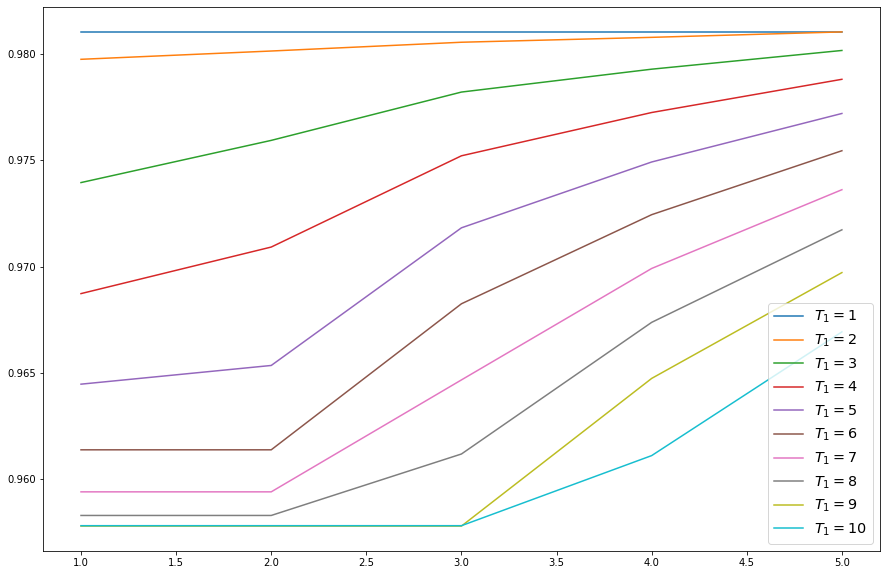

In [56]:
plt.figure(figsize=(15, 10))
x_labels = [1,2,3,4,5]
row_0 = plt.plot(x_labels, game.payoff_matrices[0][0])
row_1 = plt.plot(x_labels, game.payoff_matrices[0][1])
row_2 = plt.plot(x_labels, game.payoff_matrices[0][2])
row_3 = plt.plot(x_labels, game.payoff_matrices[0][3])
row_4 = plt.plot(x_labels, game.payoff_matrices[0][4])
row_5 = plt.plot(x_labels, game.payoff_matrices[0][5])
row_6 = plt.plot(x_labels, game.payoff_matrices[0][6])
row_7 = plt.plot(x_labels, game.payoff_matrices[0][7])
row_8 = plt.plot(x_labels, game.payoff_matrices[0][8])
row_9 = plt.plot(x_labels, game.payoff_matrices[0][9])
plt.legend(["$T_1=1$", "$T_1=2$", "$T_1=3$", "$T_1=4$", "$T_1=5$", "$T_1=6$", "$T_1=7$", "$T_1=8$", "$T_1=9$", "$T_1=1$0"], fontsize="x-large")

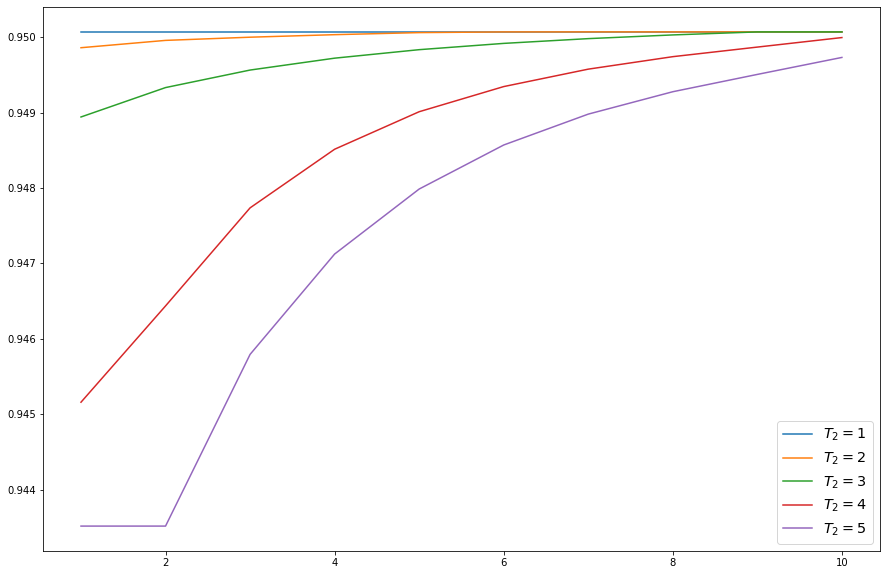

In [59]:
plt.figure(figsize=(15, 10))
x_labels = [1,2,3,4,5,6,7,8,9,10]
row_0 = plt.plot(x_labels, game.payoff_matrices[1][:, 0])
row_1 = plt.plot(x_labels, game.payoff_matrices[1][:, 1])
row_2 = plt.plot(x_labels, game.payoff_matrices[1][:, 2])
row_3 = plt.plot(x_labels, game.payoff_matrices[1][:, 3])
row_4 = plt.plot(x_labels, game.payoff_matrices[1][:, 4])
plt.legend(["$T_2=1$", "$T_2=2$", "$T_2=3$", "$T_2=4$", "$T_2=5$"], fontsize="x-large")

## 2. Decreased $\lambda_2$

In [12]:
game_2 = build_game_using_payoff_matrices(
    lambda_2=0.5,
    lambda_1_1=1,
    lambda_1_2=1,
    mu_1=4,
    mu_2=3,
    num_of_servers_1=2,
    num_of_servers_2=3,
    system_capacity_1=10,
    system_capacity_2=5,
    buffer_capacity_1=10,
    buffer_capacity_2=5,
    target=1,
)
game_2

Bi matrix game with payoff matrices:

Row player:
[[0.98103978 0.98103978 0.98103978 0.98103978 0.98103978]
 [0.98076838 0.98078904 0.98103978 0.98103978 0.98103978]
 [0.98031038 0.98031038 0.98065082 0.98103978 0.98103978]
 [0.9801557  0.9801557  0.9801557  0.9806475  0.98103978]
 [0.9801084  0.9801084  0.9801084  0.9801084  0.98072937]
 [0.98009554 0.98009554 0.98009554 0.98009554 0.98029336]
 [0.98009245 0.98009245 0.98009245 0.98009245 0.98009245]
 [0.9800918  0.9800918  0.9800918  0.9800918  0.9800918 ]
 [0.98009168 0.98009168 0.98009168 0.98009168 0.98009168]
 [0.98009168 0.98009168 0.98009168 0.98009168 0.98009168]]

Column player:
[[0.95007288 0.95001744 0.94992858 0.94978669 0.94976218]
 [0.95007288 0.95006814 0.94992858 0.94978669 0.94976218]
 [0.95007288 0.95007288 0.95001556 0.94978669 0.94976218]
 [0.95007288 0.95007288 0.95007288 0.94995385 0.94976218]
 [0.95007288 0.95007288 0.95007288 0.95007288 0.94991236]
 [0.95007288 0.95007288 0.95007288 0.95007288 0.95003551]
 [0.9

In [13]:
ficititious_play_array = tuple(game_2.fictitious_play(iterations=1000))
ficititious_play_array[-1]

[array([997.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([997.,   1.,   0.,   2.,   0.])]

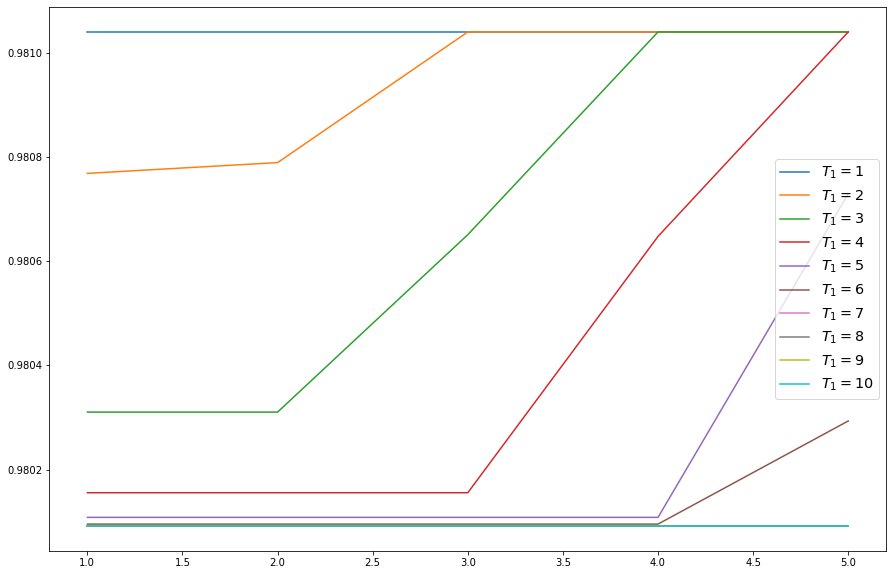

In [57]:
plt.figure(figsize=(15, 10))
x_labels = [1,2,3,4,5]
row_0 = plt.plot(x_labels, game_2.payoff_matrices[0][0])
row_1 = plt.plot(x_labels, game_2.payoff_matrices[0][1])
row_2 = plt.plot(x_labels, game_2.payoff_matrices[0][2])
row_3 = plt.plot(x_labels, game_2.payoff_matrices[0][3])
row_4 = plt.plot(x_labels, game_2.payoff_matrices[0][4])
row_5 = plt.plot(x_labels, game_2.payoff_matrices[0][5])
row_6 = plt.plot(x_labels, game_2.payoff_matrices[0][6])
row_7 = plt.plot(x_labels, game_2.payoff_matrices[0][7])
row_8 = plt.plot(x_labels, game_2.payoff_matrices[0][8])
row_9 = plt.plot(x_labels, game_2.payoff_matrices[0][9])
plt.legend(["$T_1=1$", "$T_1=2$", "$T_1=3$", "$T_1=4$", "$T_1=5$", "$T_1=6$", "$T_1=7$", "$T_1=8$", "$T_1=9$", "$T_1=1$0"], fontsize="x-large")

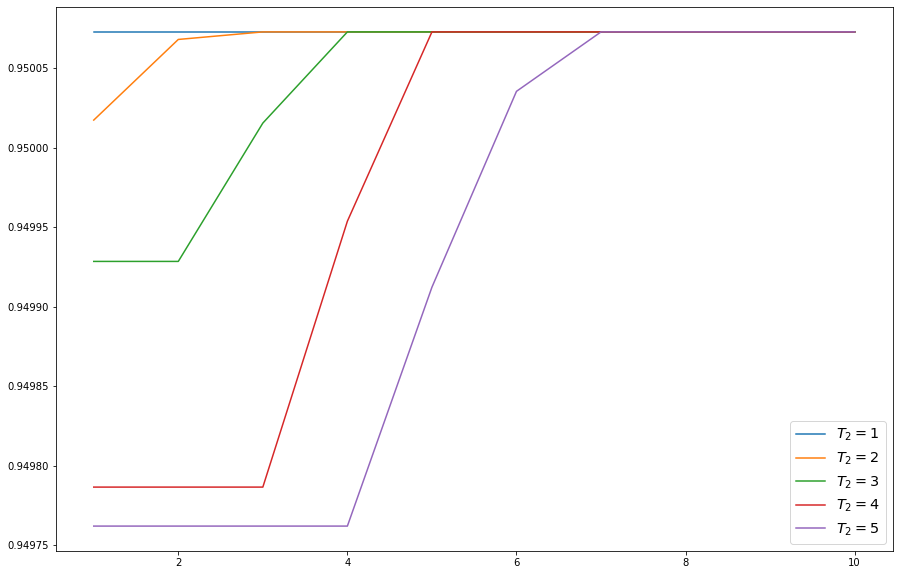

In [60]:
plt.figure(figsize=(15, 10))
x_labels = [1,2,3,4,5,6,7,8,9,10]
row_0 = plt.plot(x_labels, game_2.payoff_matrices[1][:, 0])
row_1 = plt.plot(x_labels, game_2.payoff_matrices[1][:, 1])
row_2 = plt.plot(x_labels, game_2.payoff_matrices[1][:, 2])
row_3 = plt.plot(x_labels, game_2.payoff_matrices[1][:, 3])
row_4 = plt.plot(x_labels, game_2.payoff_matrices[1][:, 4])
plt.legend(["$T_2=1$", "$T_2=2$", "$T_2=3$", "$T_2=4$", "$T_2=5$"], fontsize="x-large")

## 3. Decreased $\lambda_1^1$ and $\lambda_1^2$

In [14]:
game_3 = build_game_using_payoff_matrices(
    lambda_2=3,
    lambda_1_1=0.1,
    lambda_1_2=0.1,
    mu_1=4,
    mu_2=3,
    num_of_servers_1=2,
    num_of_servers_2=3,
    system_capacity_1=10,
    system_capacity_2=5,
    buffer_capacity_1=10,
    buffer_capacity_2=5,
    target=1,
)
game_3

Bi matrix game with payoff matrices:

Row player:
[[0.98167868 0.98167868 0.98167868 0.98167868 0.98167868]
 [0.98156236 0.98159504 0.98162735 0.98164471 0.98165758]
 [0.97779989 0.9792459  0.98039885 0.98091967 0.98123481]
 [0.97494224 0.97701155 0.97902828 0.98001697 0.98063027]
 [0.97315346 0.97506195 0.97766659 0.97905512 0.97993832]
 [0.97212492 0.97351273 0.97640407 0.97809893 0.97921106]
 [0.97160369 0.97238098 0.97528633 0.9771842  0.97847881]
 [0.97137021 0.97137021 0.97432501 0.97632848 0.97775937]
 [0.97127725 0.97127725 0.97351181 0.97553848 0.97706308]
 [0.97124795 0.97124795 0.9728047  0.97478825 0.97637251]]

Column player:
[[0.95021278 0.95021028 0.95013751 0.94773104 0.94655727]
 [0.95021278 0.95021131 0.95016963 0.94883636 0.94770865]
 [0.95021278 0.95021177 0.95018573 0.94943377 0.94869285]
 [0.95021278 0.9502121  0.95019567 0.94976363 0.94928062]
 [0.95021278 0.95021235 0.95020193 0.94994985 0.94963082]
 [0.95021278 0.95021252 0.95020594 0.95005746 0.9498441 ]
 [0.9

In [16]:
ficititious_play_array = tuple(game_3.fictitious_play(iterations=1000))
ficititious_play_array[-1]

[array([999.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([999.,   0.,   0.,   1.,   0.])]

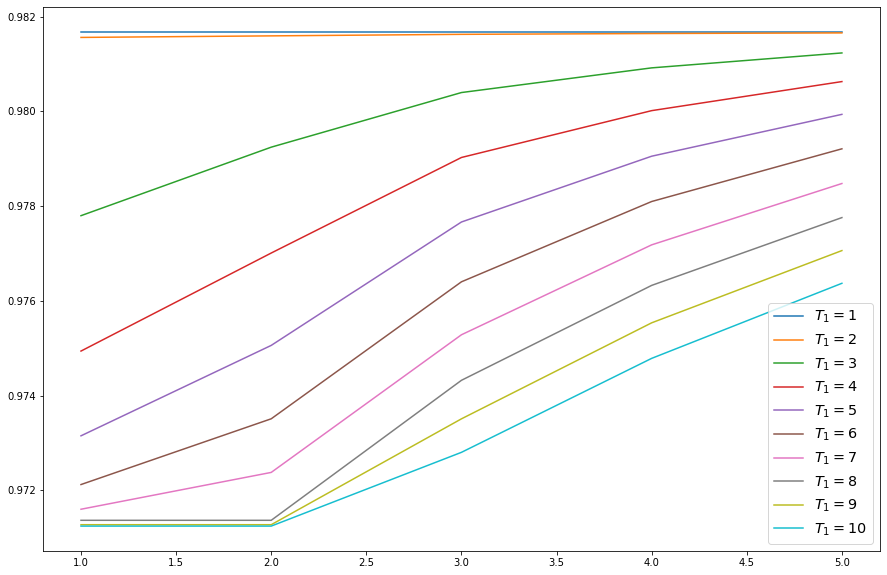

In [61]:
plt.figure(figsize=(15, 10))
x_labels = [1,2,3,4,5]
row_0 = plt.plot(x_labels, game_3.payoff_matrices[0][0])
row_1 = plt.plot(x_labels, game_3.payoff_matrices[0][1])
row_2 = plt.plot(x_labels, game_3.payoff_matrices[0][2])
row_3 = plt.plot(x_labels, game_3.payoff_matrices[0][3])
row_4 = plt.plot(x_labels, game_3.payoff_matrices[0][4])
row_5 = plt.plot(x_labels, game_3.payoff_matrices[0][5])
row_6 = plt.plot(x_labels, game_3.payoff_matrices[0][6])
row_7 = plt.plot(x_labels, game_3.payoff_matrices[0][7])
row_8 = plt.plot(x_labels, game_3.payoff_matrices[0][8])
row_9 = plt.plot(x_labels, game_3.payoff_matrices[0][9])
plt.legend(["$T_1=1$", "$T_1=2$", "$T_1=3$", "$T_1=4$", "$T_1=5$", "$T_1=6$", "$T_1=7$", "$T_1=8$", "$T_1=9$", "$T_1=1$0"], fontsize="x-large")

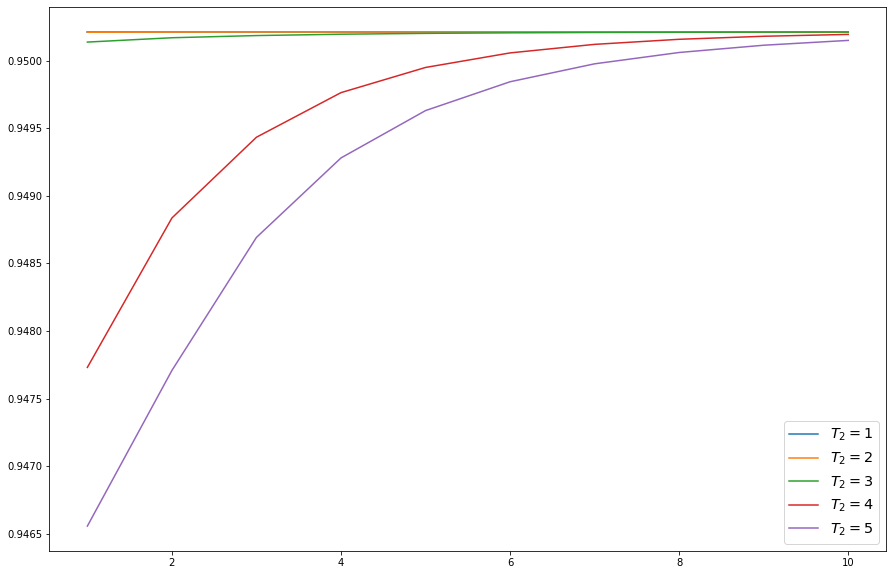

In [62]:
plt.figure(figsize=(15, 10))
x_labels = [1,2,3,4,5,6,7,8,9,10]
row_0 = plt.plot(x_labels, game_3.payoff_matrices[1][:, 0])
row_1 = plt.plot(x_labels, game_3.payoff_matrices[1][:, 1])
row_2 = plt.plot(x_labels, game_3.payoff_matrices[1][:, 2])
row_3 = plt.plot(x_labels, game_3.payoff_matrices[1][:, 3])
row_4 = plt.plot(x_labels, game_3.payoff_matrices[1][:, 4])
plt.legend(["$T_2=1$", "$T_2=2$", "$T_2=3$", "$T_2=4$", "$T_2=5$"], fontsize="x-large")

## 4. Increased $\mu_1$ and $\mu_2$

In [17]:
game_4 = build_game_using_payoff_matrices(
    lambda_2=3,
    lambda_1_1=1,
    lambda_1_2=1,
    mu_1=5,
    mu_2=5,
    num_of_servers_1=2,
    num_of_servers_2=3,
    system_capacity_1=10,
    system_capacity_2=5,
    buffer_capacity_1=10,
    buffer_capacity_2=5,
    target=1,
)
game_4

Bi matrix game with payoff matrices:

Row player:
[[0.99311172 0.99311172 0.99311172 0.99311172 0.99311172]
 [0.99278959 0.99294027 0.99306893 0.99311172 0.99311172]
 [0.99137222 0.99205204 0.99267584 0.99293582 0.99309553]
 [0.9902918  0.99095877 0.99208506 0.99257348 0.99287571]
 [0.98951691 0.98974664 0.99138321 0.99212022 0.99257885]
 [0.98900578 0.98900578 0.99061598 0.99160853 0.9922292 ]
 [0.98869995 0.98869995 0.98982014 0.99106017 0.99184212]
 [0.98853556 0.98853556 0.98902371 0.99048975 0.99142726]
 [0.98845981 0.98845981 0.98845981 0.98989184 0.99098026]
 [0.98844533 0.98844533 0.98844533 0.98913151 0.9904048 ]]

Column player:
[[0.99325776 0.99324866 0.99321434 0.99307139 0.99302615]
 [0.99325776 0.9932524  0.9932202  0.99307139 0.99302615]
 [0.99325776 0.99325452 0.99323303 0.9931274  0.99303511]
 [0.99325776 0.99325613 0.99324161 0.99317522 0.99310783]
 [0.99325776 0.99325739 0.99324748 0.99320501 0.99315588]
 [0.99325776 0.99325776 0.99325159 0.99322402 0.9931879 ]
 [0.9

In [18]:
ficititious_play_array = tuple(game_4.fictitious_play(iterations=1000))
ficititious_play_array[-1]

[array([999.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([999.,   0.,   0.,   1.,   0.])]

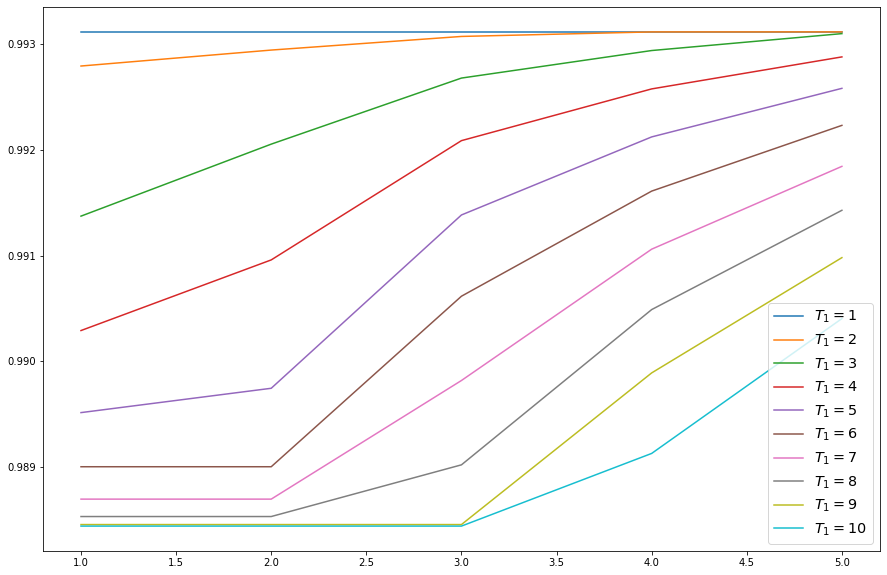

In [63]:
plt.figure(figsize=(15, 10))
x_labels = [1,2,3,4,5]
row_0 = plt.plot(x_labels, game_4.payoff_matrices[0][0])
row_1 = plt.plot(x_labels, game_4.payoff_matrices[0][1])
row_2 = plt.plot(x_labels, game_4.payoff_matrices[0][2])
row_3 = plt.plot(x_labels, game_4.payoff_matrices[0][3])
row_4 = plt.plot(x_labels, game_4.payoff_matrices[0][4])
row_5 = plt.plot(x_labels, game_4.payoff_matrices[0][5])
row_6 = plt.plot(x_labels, game_4.payoff_matrices[0][6])
row_7 = plt.plot(x_labels, game_4.payoff_matrices[0][7])
row_8 = plt.plot(x_labels, game_4.payoff_matrices[0][8])
row_9 = plt.plot(x_labels, game_4.payoff_matrices[0][9])
plt.legend(["$T_1=1$", "$T_1=2$", "$T_1=3$", "$T_1=4$", "$T_1=5$", "$T_1=6$", "$T_1=7$", "$T_1=8$", "$T_1=9$", "$T_1=1$0"], fontsize="x-large")

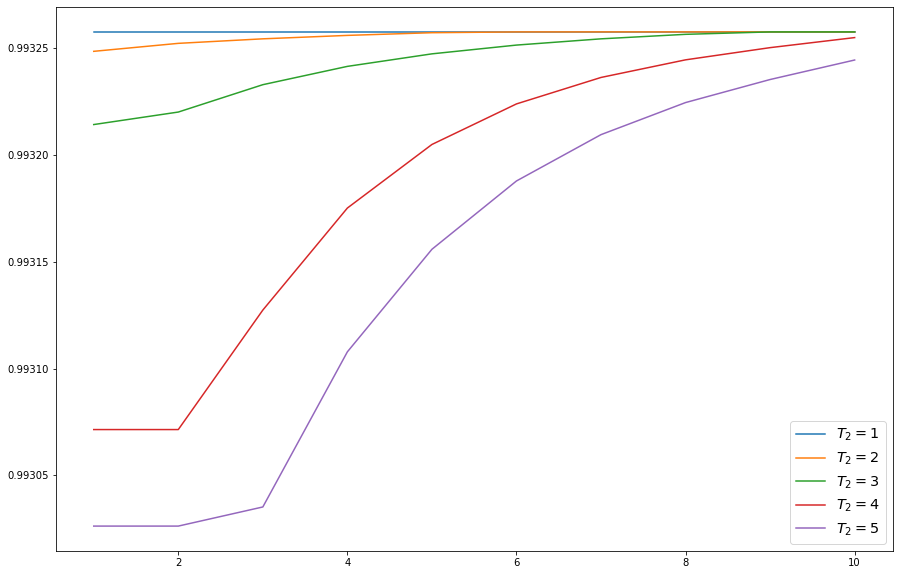

In [64]:
plt.figure(figsize=(15, 10))
x_labels = [1,2,3,4,5,6,7,8,9,10]
row_0 = plt.plot(x_labels, game_4.payoff_matrices[1][:, 0])
row_1 = plt.plot(x_labels, game_4.payoff_matrices[1][:, 1])
row_2 = plt.plot(x_labels, game_4.payoff_matrices[1][:, 2])
row_3 = plt.plot(x_labels, game_4.payoff_matrices[1][:, 3])
row_4 = plt.plot(x_labels, game_4.payoff_matrices[1][:, 4])
plt.legend(["$T_2=1$", "$T_2=2$", "$T_2=3$", "$T_2=4$", "$T_2=5$"], fontsize="x-large")

## 5. Increased $N_1$ 

In [19]:
game_5 = build_game_using_payoff_matrices(
    lambda_2=3,
    lambda_1_1=1,
    lambda_1_2=1,
    mu_1=5,
    mu_2=5,
    num_of_servers_1=2,
    num_of_servers_2=3,
    system_capacity_1=10,
    system_capacity_2=10,
    buffer_capacity_1=10,
    buffer_capacity_2=5,
    target=1,
)
game_5

Bi matrix game with payoff matrices:

Row player:
[[0.99311172 0.99311172 0.99311172 0.99311172 0.99311172 0.99311172
  0.99311172 0.99311172 0.99311172 0.99311172]
 [0.99278959 0.99294026 0.99306882 0.99311172 0.99311172 0.99311172
  0.99311172 0.99311172 0.99311172 0.99311172]
 [0.99137222 0.992052   0.99267542 0.9929329  0.99307722 0.99311172
  0.99311172 0.99311172 0.99311172 0.99311172]
 [0.9902918  0.9909587  0.99208436 0.99256859 0.99284401 0.99300642
  0.99311172 0.99311172 0.99311172 0.99311172]
 [0.98951691 0.98974655 0.99138227 0.99211354 0.99253456 0.99278934
  0.99294942 0.99305289 0.99311172 0.99311172]
 [0.98900578 0.98900578 0.99061483 0.99160027 0.99217362 0.99252649
  0.99275359 0.99290493 0.99300946 0.99309051]
 [0.98869995 0.98869995 0.98981883 0.99105058 0.99177666 0.99222986
  0.99252653 0.9927283  0.99287088 0.99298392]
 [0.98853556 0.98853556 0.98902229 0.99047909 0.99135332 0.99190681
  0.99227434 0.99252813 0.99271041 0.99285692]
 [0.98845981 0.98845981 0.9884

In [20]:
ficititious_play_array = tuple(game_5.fictitious_play(iterations=1000))
ficititious_play_array[-1]

[array([998.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.]),
 array([998.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.])]

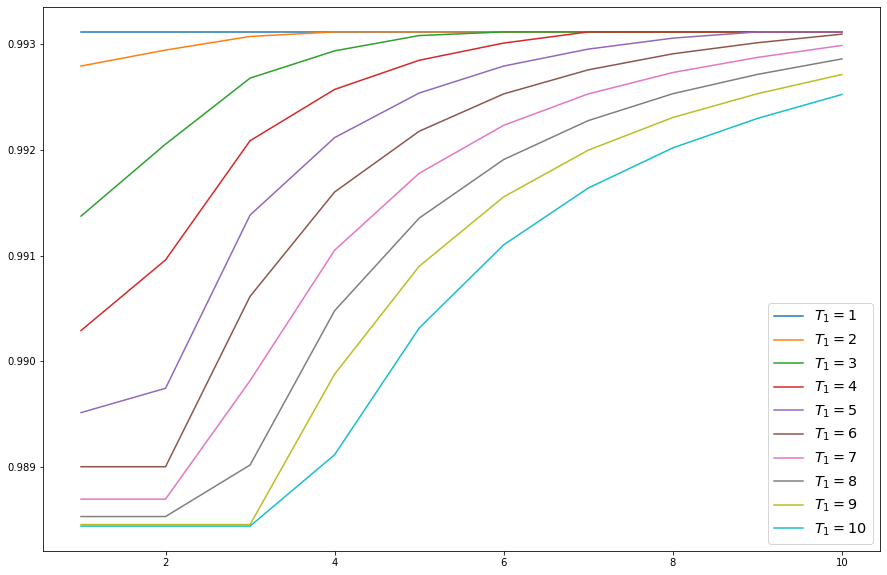

In [66]:
plt.figure(figsize=(15, 10))
x_labels = [1,2,3,4,5,6,7,8,9,10]
row_0 = plt.plot(x_labels, game_5.payoff_matrices[0][0])
row_1 = plt.plot(x_labels, game_5.payoff_matrices[0][1])
row_2 = plt.plot(x_labels, game_5.payoff_matrices[0][2])
row_3 = plt.plot(x_labels, game_5.payoff_matrices[0][3])
row_4 = plt.plot(x_labels, game_5.payoff_matrices[0][4])
row_5 = plt.plot(x_labels, game_5.payoff_matrices[0][5])
row_6 = plt.plot(x_labels, game_5.payoff_matrices[0][6])
row_7 = plt.plot(x_labels, game_5.payoff_matrices[0][7])
row_8 = plt.plot(x_labels, game_5.payoff_matrices[0][8])
row_9 = plt.plot(x_labels, game_5.payoff_matrices[0][9])
plt.legend(["$T_1=1$", "$T_1=2$", "$T_1=3$", "$T_1=4$", "$T_1=5$", "$T_1=6$", "$T_1=7$", "$T_1=8$", "$T_1=9$", "$T_1=1$0"], fontsize="x-large")

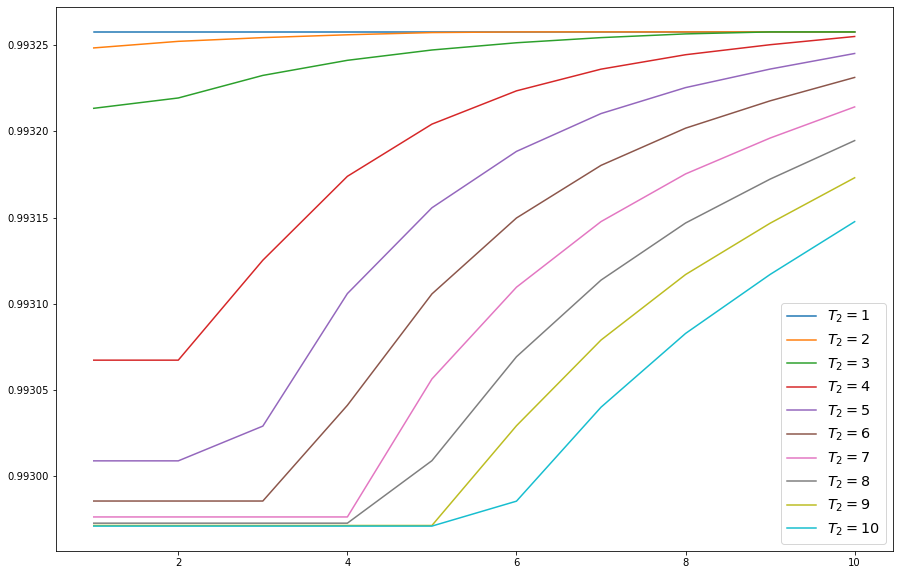

In [68]:
plt.figure(figsize=(15, 10))
x_labels = [1,2,3,4,5,6,7,8,9,10]
row_0 = plt.plot(x_labels, game_5.payoff_matrices[1][:, 0])
row_1 = plt.plot(x_labels, game_5.payoff_matrices[1][:, 1])
row_2 = plt.plot(x_labels, game_5.payoff_matrices[1][:, 2])
row_3 = plt.plot(x_labels, game_5.payoff_matrices[1][:, 3])
row_4 = plt.plot(x_labels, game_5.payoff_matrices[1][:, 4])
row_5 = plt.plot(x_labels, game_5.payoff_matrices[1][:, 5])
row_6 = plt.plot(x_labels, game_5.payoff_matrices[1][:, 6])
row_7 = plt.plot(x_labels, game_5.payoff_matrices[1][:, 7])
row_8 = plt.plot(x_labels, game_5.payoff_matrices[1][:, 8])
row_9 = plt.plot(x_labels, game_5.payoff_matrices[1][:, 9])
plt.legend(["$T_2=1$", "$T_2=2$", "$T_2=3$", "$T_2=4$", "$T_2=5$", "$T_2=6$", "$T_2=7$", "$T_2=8$" ,"$T_2=9$", "$T_2=10$"], fontsize="x-large")

In [4]:
game_3 = build_game_using_payoff_matrices(
    lambda_2=3,
    lambda_1_1=0.1,
    lambda_1_2=0.1,
    mu_1=4,
    mu_2=3,
    num_of_servers_1=2,
    num_of_servers_2=3,
    system_capacity_1=10,
    system_capacity_2=5,
    buffer_capacity_1=10,
    buffer_capacity_2=5,
    target=1,
)
game_3

Bi matrix game with payoff matrices:

Row player:
[[-0.00100354 -0.00100354 -0.00100354 -0.00100354 -0.00100354]
 [-0.00099618 -0.00099825 -0.00100029 -0.00100139 -0.0010022 ]
 [-0.00077283 -0.00085532 -0.00092409 -0.00095603 -0.00097561]
 [-0.00062212 -0.00072962 -0.00084264 -0.00090102 -0.00093821]
 [-0.00053608 -0.0006281  -0.00076544 -0.0008442  -0.0008963 ]
 [-0.00048951 -0.00055285 -0.00069718 -0.00078955 -0.00085329]
 [-0.00046672 -0.00050091 -0.0006394  -0.00073898 -0.00081104]
 [-0.00045669 -0.00045669 -0.00059171 -0.00069319 -0.00077058]
 [-0.00045272 -0.00045272 -0.00055281 -0.00065221 -0.00073241]
 [-0.00045148 -0.00045148 -0.00052005 -0.00061446 -0.00069551]]

Column player:
[[-4.52750275e-08 -4.42188699e-08 -1.89080448e-08 -5.14819864e-06
  -1.18523633e-05]
 [-4.52750275e-08 -4.46504812e-08 -2.87728161e-08 -1.35405296e-06
  -5.25030478e-06]
 [-4.52750275e-08 -4.48459184e-08 -3.44967167e-08 -3.20612274e-07
  -1.70864556e-06]
 [-4.52750275e-08 -4.49874031e-08 -3.82850103e-0

In [5]:
list(game_3.support_enumeration())

[(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 1.]))]

In [10]:
iterations = 100
np.random.seed(0)
play_counts = tuple(game_3.fictitious_play(iterations=iterations))

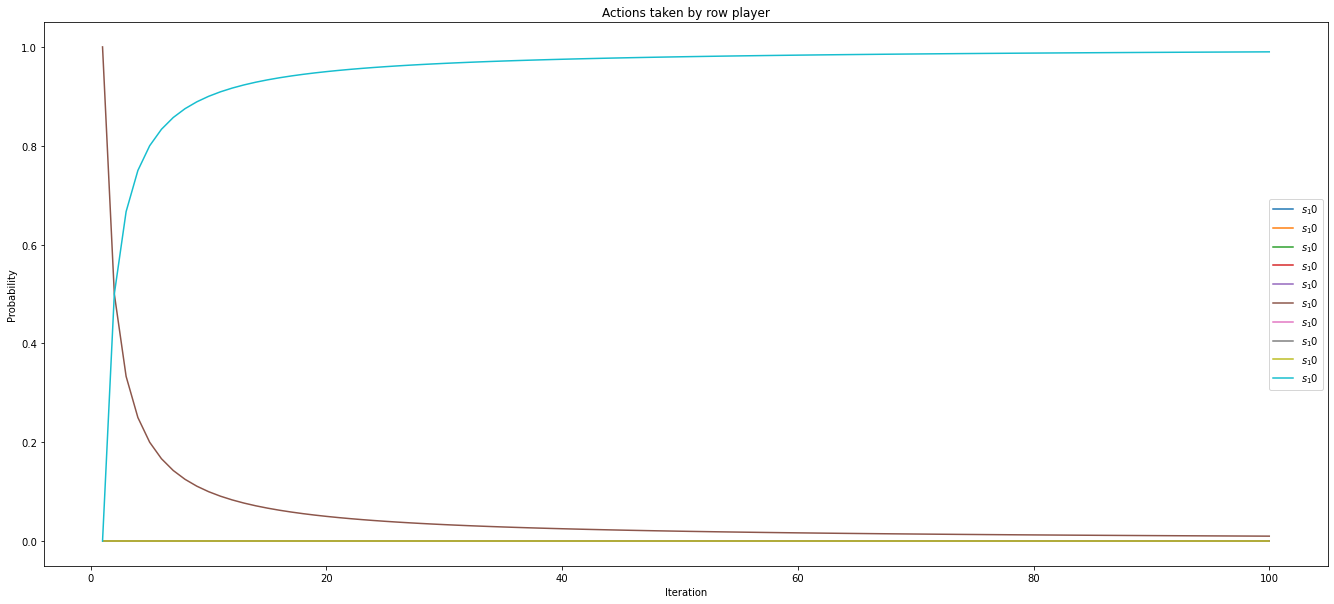

In [11]:
plt.figure(figsize=(23, 10))
probabilities = [row_play_counts / np.sum(row_play_counts) for row_play_counts, col_play_counts in play_counts]
number = 10
for strategy in zip(*probabilities):
    plt.plot(strategy, label=f"$s_{number}$")  
plt.xlabel("Iteration")  
plt.ylabel("Probability")  
plt.title("Actions taken by row player")  
plt.legend()  
